In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#@title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [5]:
# @title Plotting Functions

def plot_switch_simulation(t, x):
  fig = plt.figure()
  plt.plot(t, x)
  plt.title('State-switch simulation')
  plt.xlabel('Time')
  plt.xlim((0, 300)) # zoom in time
  plt.ylabel('State of ion channel 0/1', labelpad=-60)
  plt.yticks([0, 1], ['Closed (0)', 'Open (1)'])
  plt.show()
  return

def plot_interswitch_interval_histogram(inter_switch_intervals):
  fig = plt.figure()
  plt.hist(inter_switch_intervals)
  plt.title('Inter-switch Intervals Distribution')
  plt.ylabel('Interval Count')
  plt.xlabel('time')
  plt.show()

def plot_state_probabilities(time, states):
  fig = plt.figure()
  plt.plot(time, states[:,0], label='Closed to open')
  plt.plot(time, states[:,1], label='Open to closed')
  plt.legend()
  plt.xlabel('time')
  plt.ylabel('prob(open OR closed)')

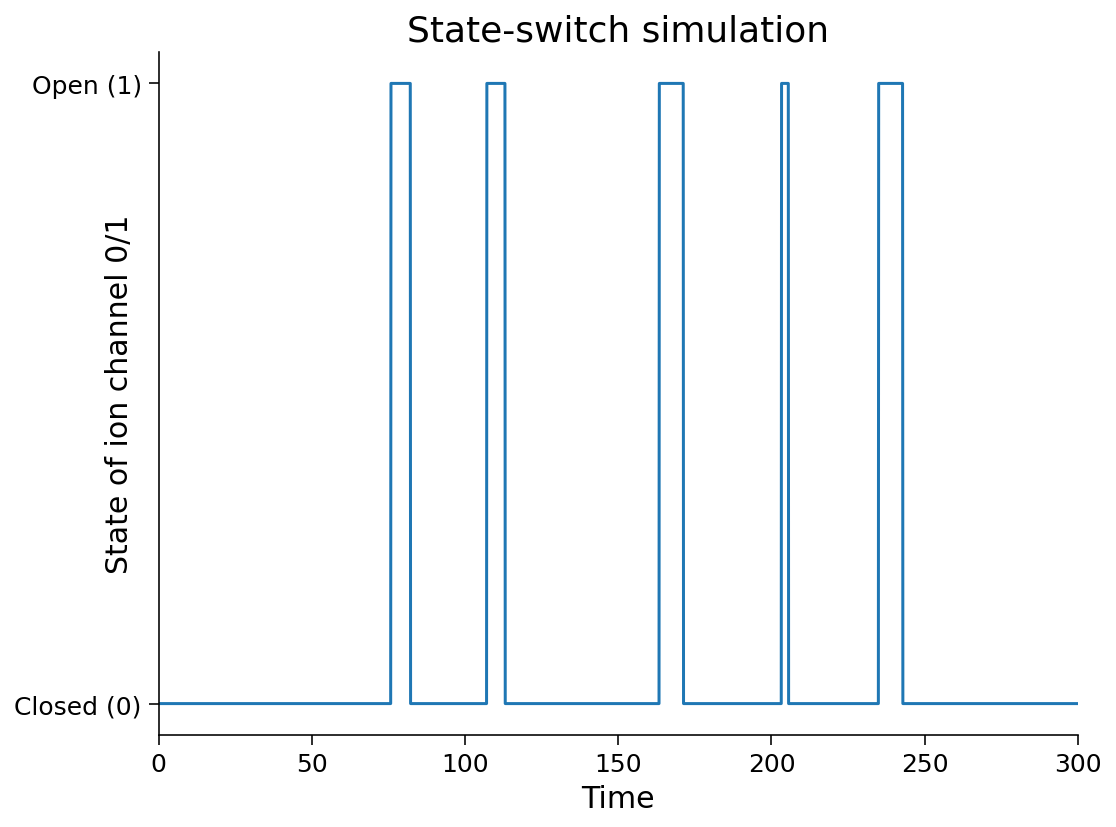

In [6]:
# @markdown Execute to simulate state changes

# parameters
T = 5000     # total Time duration
dt = 0.001   # timestep of our simulation

# simulate state of our ion channel in time
# the two parameters that govern transitions are
# c2o: closed to open rate
# o2c: open to closed rate
def ion_channel_opening(c2o, o2c, T, dt):
    # initialize variables
    t = np.arange(0, T, dt)
    x = np.zeros_like(t)
    switch_times = []

    # assume we always start in Closed state
    x[0] = 0

    # generate a bunch of random uniformly distributed numbers
    # between zero and unity: [0, 1),
    # one for each dt in our simulation.
    # we will use these random numbers to model the
    # closed/open transitions
    myrand = np.random.random_sample(size=len(t))


    # walk through time steps of the simulation
    for k in range(len(t)-1):
        # switching between closed/open states are
        # Poisson processes
        if x[k] == 0 and myrand[k] < c2o*dt: # remember to scale by dt!
            x[k+1:] = 1
            switch_times.append(k*dt)
        elif x[k] == 1 and myrand[k] < o2c*dt:
            x[k+1:] = 0
            switch_times.append(k*dt)

    return t, x, switch_times


c2o = 0.02
o2c = 0.1
np.random.seed(0) # set random seed
t, x, switch_times = ion_channel_opening(c2o, o2c, T, .1)
plot_switch_simulation(t,x)

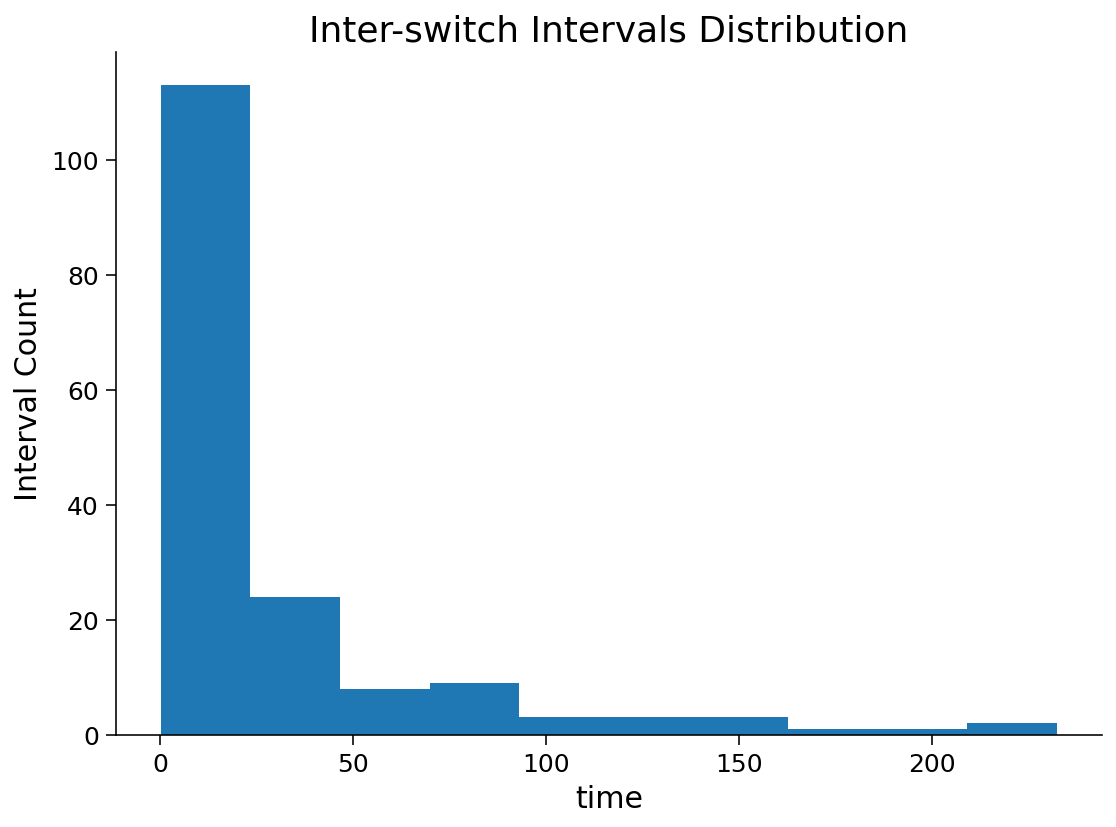

In [7]:
##############################################################################
## TODO: Insert your code here to calculate between-state-switch intervals
#raise NotImplementedError("Student exercise: need to calculate switch intervals")
##############################################################################

# hint: see np.diff()
inter_switch_intervals = np.diff(switch_times)

# plot inter-switch intervals
plot_interswitch_interval_histogram(inter_switch_intervals)

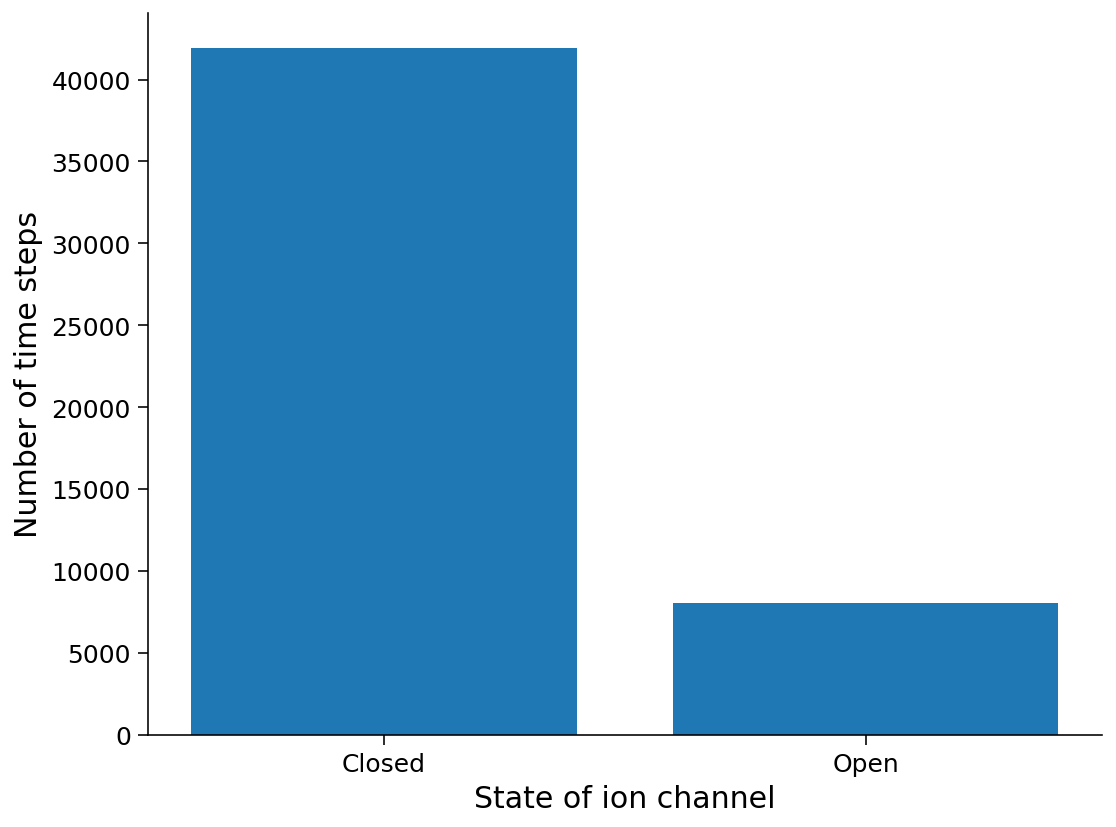

In [8]:
# @markdown Execute cell to visualize distribution of time spent in each state.

states = ['Closed', 'Open']
(unique, counts) = np.unique(x, return_counts=True)
plt.bar(states, counts)
plt.ylabel('Number of time steps')
plt.xlabel('State of ion channel');

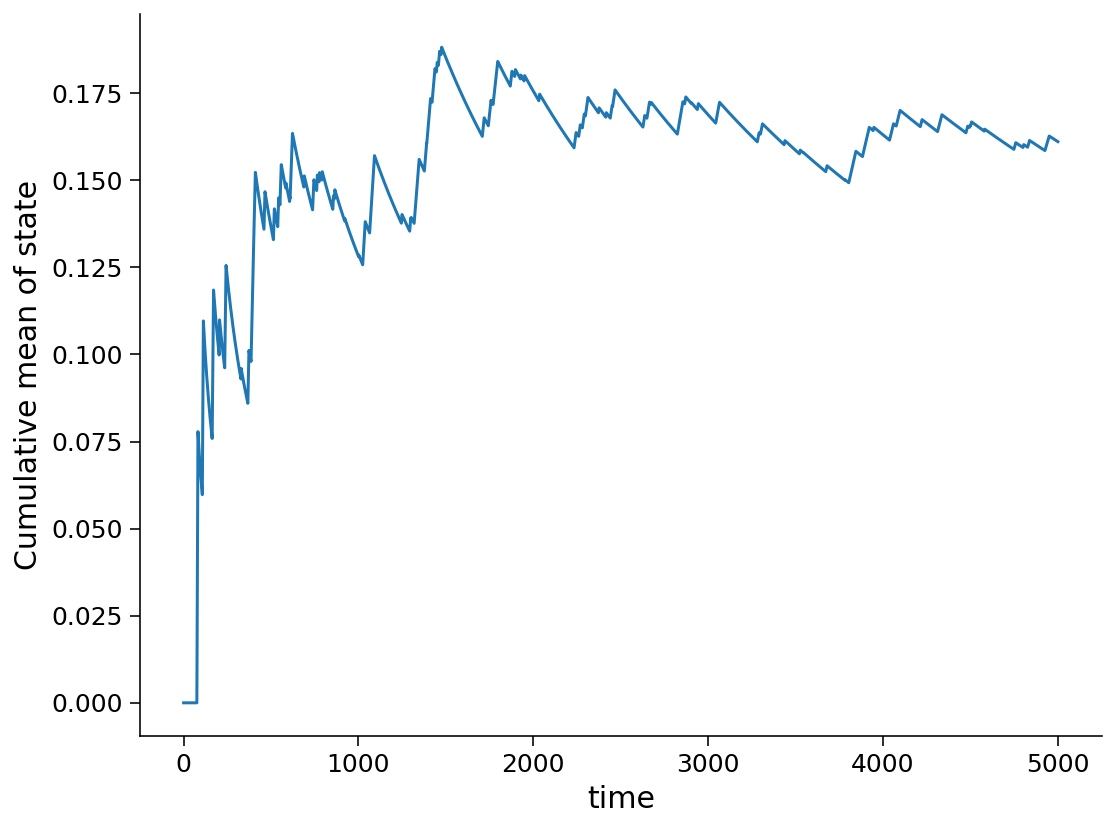

In [9]:
# @markdown Execute to visualize cumulative mean of state
plt.plot(t, np.cumsum(x) / np.arange(1, len(t)+1))
plt.xlabel('time')
plt.ylabel('Cumulative mean of state');

In [10]:
#@title

#@markdown Make sure you execute this cell to enable the widget!

@widgets.interact
def plot_inter_switch_intervals(c2o = (0,1, .01), o2c = (0, 1, .01), T=(1000,10000, 1000)):

  t, x, switch_times = ion_channel_opening(c2o, o2c, T, .1)

  inter_switch_intervals = np.diff(switch_times)

  #plot inter-switch intervals
  plt.hist(inter_switch_intervals)
  plt.title('Inter-switch Intervals Distribution')
  plt.ylabel('Interval Count')
  plt.xlabel('time')
  plt.show()
  plt.close()

interactive(children=(FloatSlider(value=0.0, description='c2o', max=1.0, step=0.01), FloatSlider(value=0.0, de…

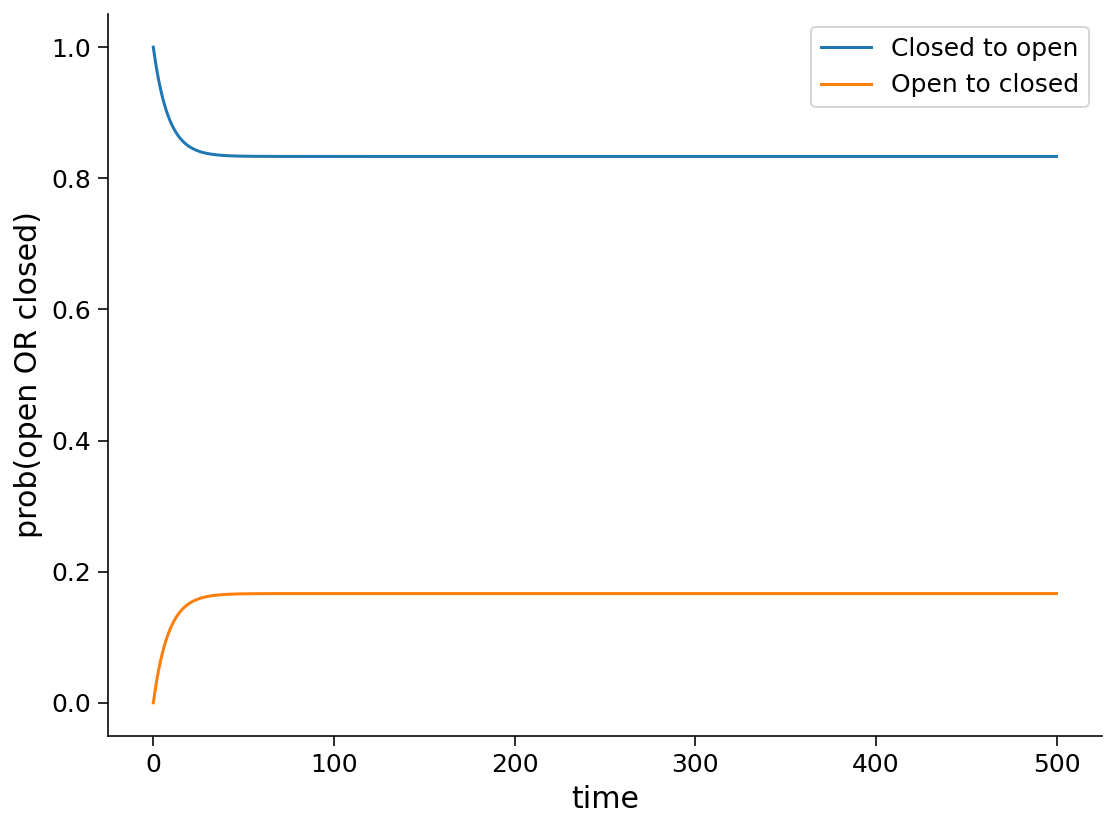

In [15]:
def simulate_prob_prop(A, x0, dt, T):
  """ Simulate the propagation of probabilities given the transition matrix A,
  with initial state x0, for a duration of T at timestep dt.

  Args:
    A (ndarray): state transition matrix
    x0 (ndarray): state probabilities at time 0
    dt (scalar): timestep of the simulation
    T (scalar): total duration of the simulation

  Returns:
    ndarray, ndarray: `x` for all simulation steps and the time `t` at each step
  """

  # Initialize variables
  t = np.arange(0, T, dt)
  x = x0 # x at time t_0

  # Step through the system in time
  for k in range(len(t)-1):
    ###################################################################
    ## TODO: Insert your code here to compute x_kp1 (x at k plus 1)
    #raise NotImplementedError("Student exercise: need to implement simulation")
    ## hint: use np.dot(a, b) function to compute the dot product
    ##       of the transition matrix A and the last state in x
    ## hint 2: use np.vstack to append the latest state to x
    ###################################################################

    # Compute the state of x at time k+1
    x_kp1 = np.dot(A, x[-1])

    # Stack (append) this new state onto x to keep track of x through time steps
    x = np.vstack((x,x_kp1))

  return x, t


# Set parameters
T = 500     # total Time duration
dt = 0.1   # timestep of our simulation

# same parameters as above
# c2o: closed to open rate
# o2c: open to closed rate
c2o = 0.02
o2c = 0.1
A = np.array([[1 - c2o*dt, o2c*dt],
              [c2o*dt,     1 - o2c*dt]])

# Initial condition: start as Closed
x0 = np.array([[1, 0]])

# Simulate probabilities propagation
x, t = simulate_prob_prop(A, x0, dt, T)

# Visualize
plot_state_probabilities(t,x)

In [16]:
print("Probability of state c2o: %.3f"%(c2o / (c2o + o2c)))
x[-1,:]

Probability of state c2o: 0.167


array([0.83333333, 0.16666667])

In [17]:
# compute the eigendecomposition of A
lam, v = np.linalg.eig(A)

# print the 2 eigenvalues
print("Eigenvalues:",lam)

# print the 2 eigenvectors
eigenvector1 = v[:,0]
eigenvector2 = v[:,1]
print("Eigenvector 1:", eigenvector1)
print("Eigenvector 2:", eigenvector2)

Eigenvalues: [1.    0.988]
Eigenvector 1: [0.98058068 0.19611614]
Eigenvector 2: [-0.70710678  0.70710678]
